In [232]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [233]:
data=pd.read_csv(r"C:\Users\Dell\Downloads\data\demo_data\7.xor.csv",header=None)

In [234]:
data.shape

(500, 3)

In [235]:
data.head()

,0,1,2
0,1.764052,0.400157,-1.0
1,0.978738,2.240893,-1.0
2,1.867558,-0.977278,1.0
3,0.950088,-0.151357,1.0
4,-0.103219,0.410599,1.0


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

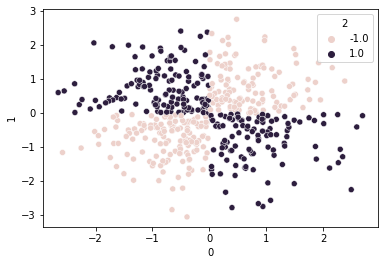

In [236]:
sns.scatterplot(data[0],data[1],hue=data[2])

In [237]:
data[2].value_counts()

-1.0    260
 1.0    240
Name: 2, dtype: int64

In [238]:
from sklearn.model_selection import train_test_split

In [239]:
x_train,x_test,y_train,y_test=train_test_split(data[[0,1]],data[2],test_size=0.1)

In [240]:
x_train.shape

(450, 2)

In [241]:
from sklearn.preprocessing import StandardScaler

In [242]:
std=StandardScaler()

In [243]:
stdd=std.fit_transform(x_train)

In [14]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: google-auth<3,>=1.6.3 in c:\users\dell\anaconda3\lib\site-packages (from tensorboard<2.12,>=2.11->tensorflow-intel==2.11.0->tensorflow) (1.33.0)




[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [244]:
import tensorflow

In [245]:
import tensorflow.keras 

In [246]:
from tensorflow.keras import Sequential

In [247]:
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

model=Sequential()
model.add(Dense(10000,activation="relu",input_dim=2,kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.8))
model.add(Dense(10000,activation="relu",kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))

model=Sequential()
model.add(Dense(20,activation="relu",input_dim=2,kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.8))
model.add(Dense(25,activation="relu",input_dim=2,kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.8))
model.add(Dense(19,activation="relu",kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))

In [249]:
model=Sequential()
model.add(Dense(19,activation="relu",input_dim=2,kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.4))
model.add(Dense(16,activation="relu",input_dim=2,kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.4))
model.add(Dense(12,activation="relu",kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.4))
model.add(Dense(19,activation="relu",kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.4))
model.add(Dense(1,activation="sigmoid"))

In [250]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_82 (Dense)            (None, 19)                57        
                                                                 
 batch_normalization_65 (Bat  (None, 19)               76        
 chNormalization)                                                
                                                                 
 dense_83 (Dense)            (None, 16)                320       
                                                                 
 batch_normalization_66 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dense_84 (Dense)            (None, 12)                204       
                                                                 
 batch_normalization_67 (Bat  (None, 12)             

In [251]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [252]:
save=model.fit(x_train,y_train,batch_size=10,epochs=20,verbose=1,validation_split=0.2)

Epoch 1/20
36/36 [==============================] - 6s 33ms/step - loss: 0.3376 - accuracy: 0.3917 - val_loss: 0.0414 - val_accuracy: 0.1556
Epoch 2/20
36/36 [==============================] - 0s 6ms/step - loss: -0.0175 - accuracy: 0.3611 - val_loss: 0.0617 - val_accuracy: 0.2444
Epoch 3/20
36/36 [==============================] - 0s 6ms/step - loss: -0.3569 - accuracy: 0.3861 - val_loss: -0.0746 - val_accuracy: 0.3111
Epoch 4/20
36/36 [==============================] - 0s 6ms/step - loss: -0.7262 - accuracy: 0.3778 - val_loss: -0.2529 - val_accuracy: 0.3556
Epoch 5/20
36/36 [==============================] - 0s 6ms/step - loss: -1.0635 - accuracy: 0.3806 - val_loss: -0.7438 - val_accuracy: 0.3556
Epoch 6/20
36/36 [==============================] - 0s 6ms/step - loss: -1.4730 - accuracy: 0.3972 - val_loss: -1.4729 - val_accuracy: 0.3556
Epoch 7/20
36/36 [==============================] - 0s 6ms/step - loss: -2.1566 - accuracy: 0.4056 - val_loss: -2.1778 - val_accuracy: 0.3444
Epoch 8/

In [255]:
tl=save.history["loss"]
cvl=save.history["val_loss"]

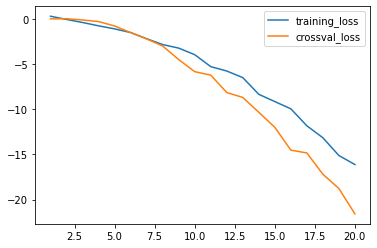

In [258]:
import matplotlib.pyplot as plt
plt.plot(range(1,21),tl,label="training_loss")
plt.plot(range(1,21),cvl,label="crossval_loss")
plt.legend()

In [259]:
predi=model.predict(x_train)

15/15 [==============================] - 0s 3ms/step


In [260]:
import numpy as np

In [261]:
preict=np.where(predi>0.5,1,0).flatten()

In [262]:
from sklearn.metrics import accuracy_score

In [263]:
accuracy_score(y_train,preict)


0.4533333333333333

In [264]:
from mlxtend.plotting import plot_decision_regions

3888/3888 [==============================] - 10s 2ms/step


<AxesSubplot:>

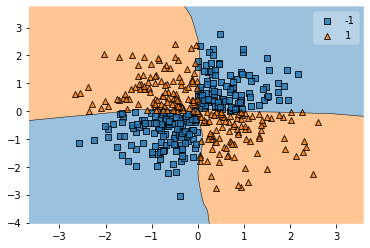

In [265]:
plot_decision_regions(x_train[[0,1]].values,y_train.values.astype(int),clf=model)